<a href="https://colab.research.google.com/github/rrmyysss/Complex-Network/blob/main/A%C4%9F6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
edges_csv = pd.read_csv("/content/mlb_games.csv", encoding='utf-16')
nodes_csv = pd.read_csv("/content/mlb_teams.csv", encoding='utf-16')

In [10]:
nodes = nodes_csv['prefix_1'].unique().tolist()
edges = edges_csv[['home_team', 'away_team']].apply(tuple, axis=1).unique().tolist() # tekrar eden kenarlar kaldırıldı.

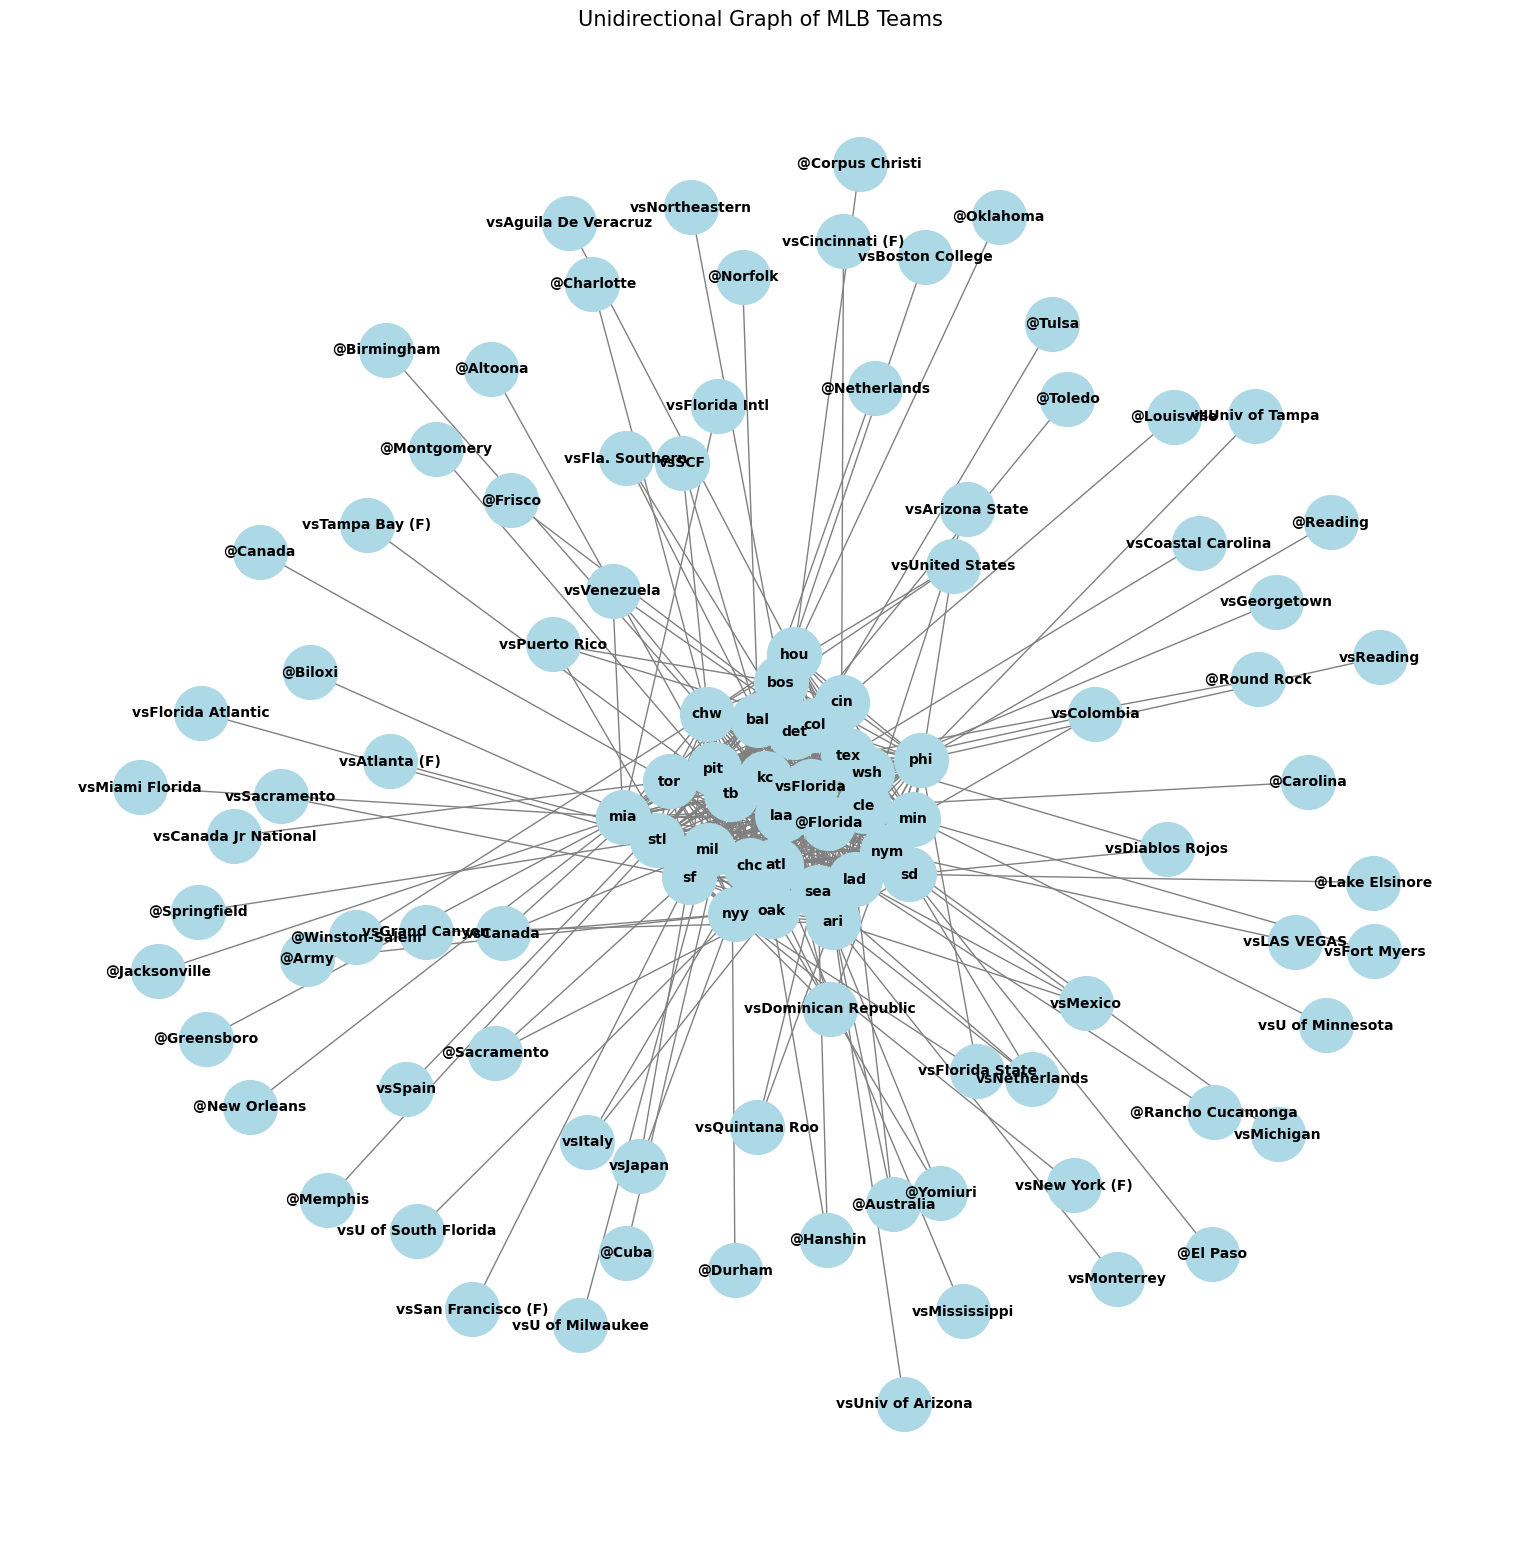

In [16]:
# Yönsüz Graf
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, k=0.4, iterations=50)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title('Unidirectional Graph of MLB Teams', size=15)
plt.show()

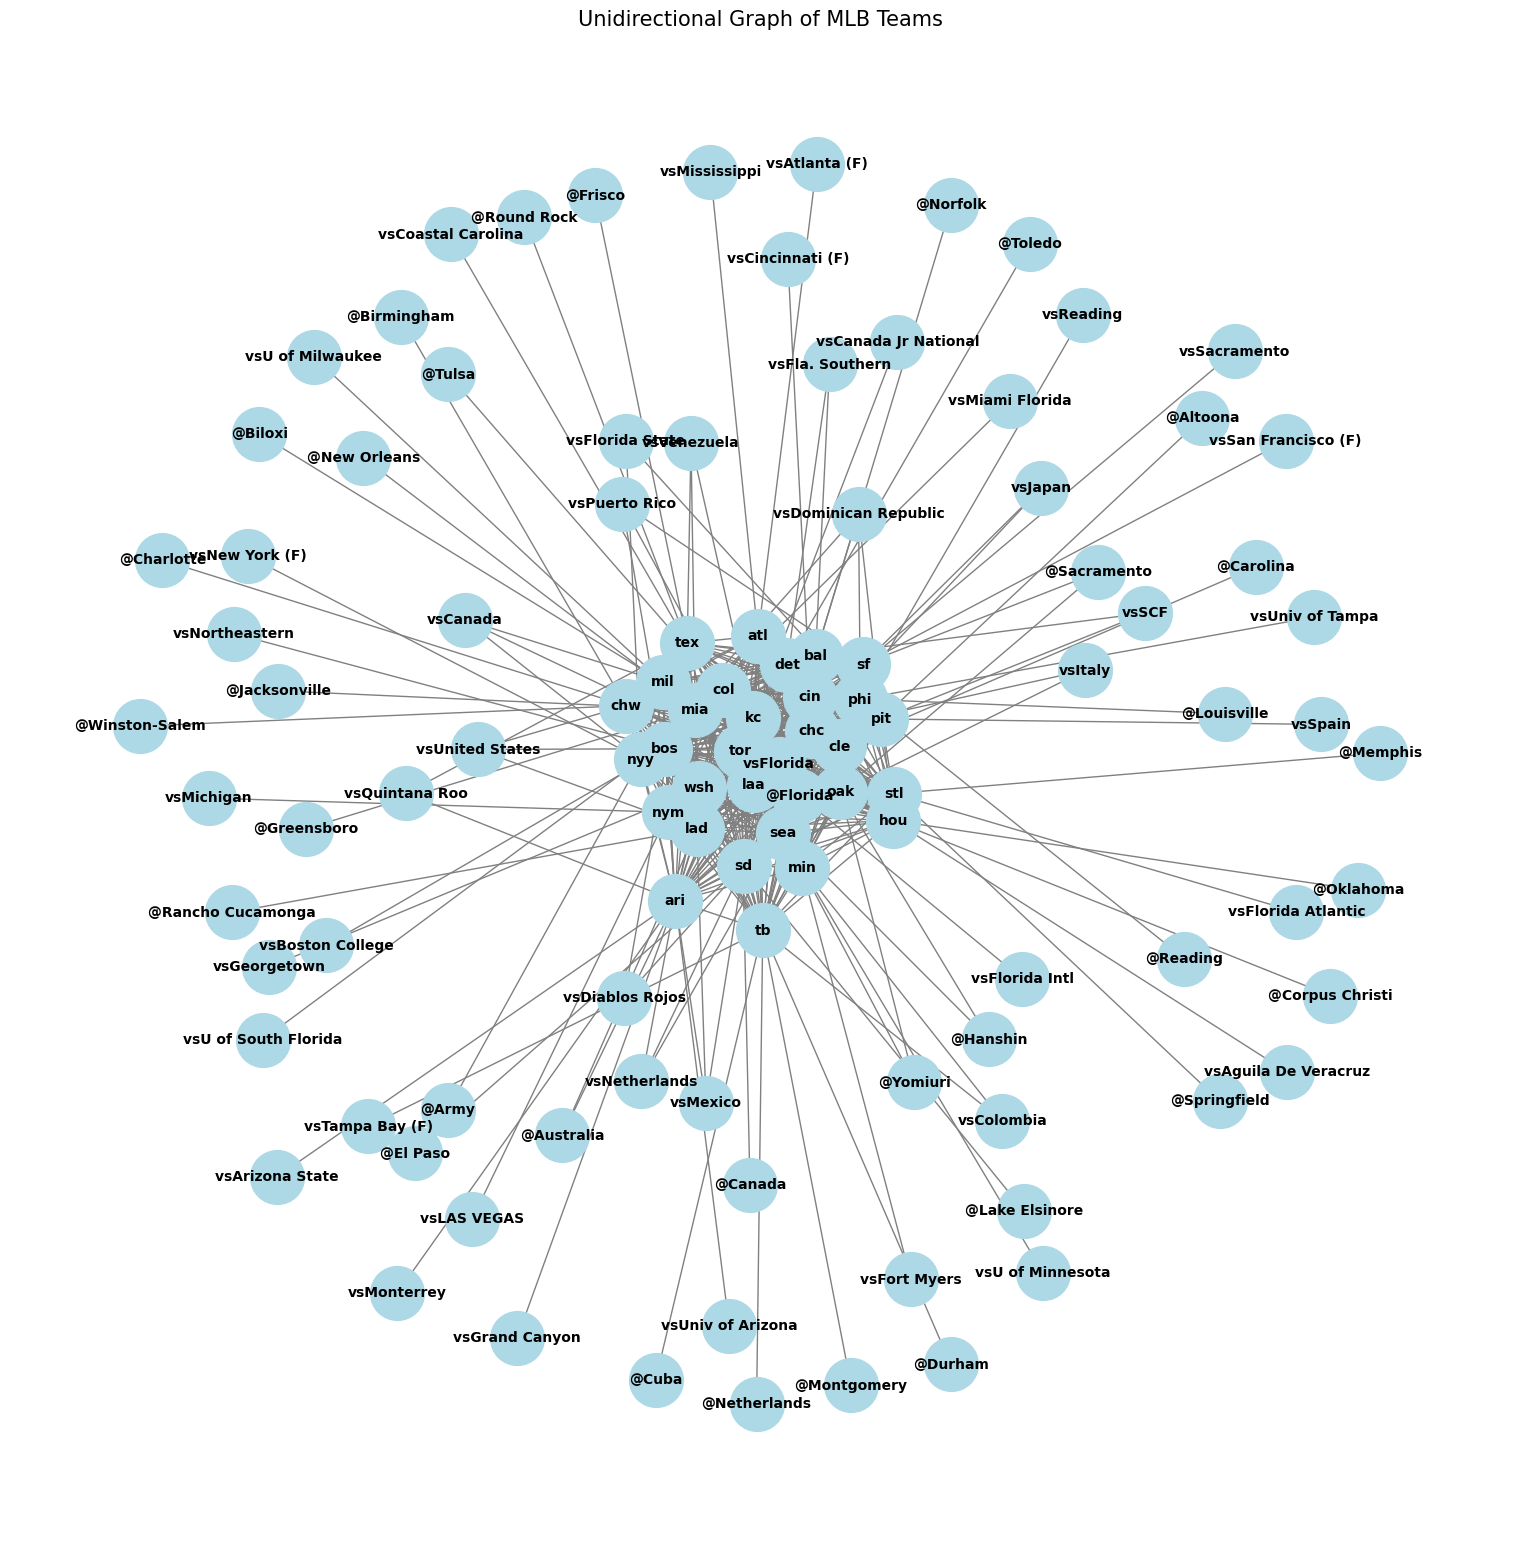

In [17]:
# Yönlü Graf
G_directed = nx.DiGraph()
G_directed.add_nodes_from(nodes)
G_directed.add_edges_from(edges)

plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, k=0.3, iterations=50)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title('Unidirectional Graph of MLB Teams', size=15)
plt.show()

In [29]:
# Düğüm dereceleri
toplam=0
degrees = dict(G.degree())
for node, degree in list(degrees.items()):
    print(f"Takım: {node}, Derece: {degree}")
    toplam+=degree

Takım: chw, Derece: 34
Takım: cle, Derece: 30
Takım: det, Derece: 33
Takım: kc, Derece: 30
Takım: min, Derece: 35
Takım: bal, Derece: 35
Takım: bos, Derece: 35
Takım: nyy, Derece: 35
Takım: tb, Derece: 37
Takım: tor, Derece: 32
Takım: hou, Derece: 34
Takım: laa, Derece: 30
Takım: oak, Derece: 34
Takım: sea, Derece: 33
Takım: tex, Derece: 37
Takım: chc, Derece: 33
Takım: cin, Derece: 33
Takım: mil, Derece: 34
Takım: pit, Derece: 35
Takım: stl, Derece: 34
Takım: atl, Derece: 33
Takım: mia, Derece: 35
Takım: nym, Derece: 33
Takım: phi, Derece: 36
Takım: wsh, Derece: 32
Takım: ari, Derece: 39
Takım: col, Derece: 33
Takım: lad, Derece: 34
Takım: sd, Derece: 36
Takım: sf, Derece: 36
Takım: vsFlorida, Derece: 23
Takım: @Winston-Salem, Derece: 1
Takım: vsUnited States, Derece: 3
Takım: @Birmingham, Derece: 1
Takım: @Charlotte, Derece: 1
Takım: @Carolina, Derece: 1
Takım: vsFla. Southern, Derece: 2
Takım: @Florida, Derece: 23
Takım: @Toledo, Derece: 1
Takım: vsVenezuela, Derece: 3
Takım: vsFort

In [30]:
print("Ortalama derece",toplam/len(degrees))

Ortalama derece 10.73394495412844


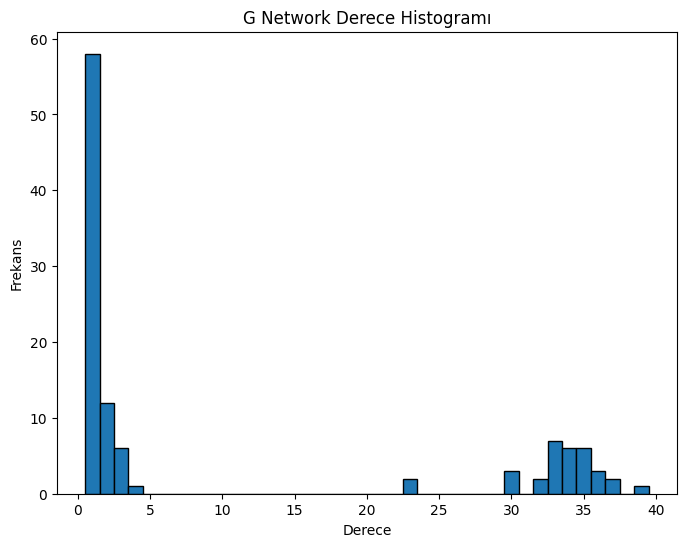

In [31]:
# Düğüm derecelerinin histogramı
plt.figure(figsize=(8, 6))
plt.hist(degrees.values(), bins=range(min(degrees.values()), max(degrees.values()) + 2), edgecolor='black', align='left')
plt.title("G Network Derece Histogramı")
plt.xlabel("Derece")
plt.ylabel("Frekans")
plt.show()

In [23]:
deg_centrality = nx.degree_centrality(G)

clo_centrality = nx.closeness_centrality(G)

bet_centrality = nx.betweenness_centrality(G)

eig_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Katz Centrality
# Katz için uygun bir alpha seçimi: 1 / lambda_max'tan küçük olmalı
try:
    lambda_max = max(nx.adjacency_spectrum(G)).real
    alpha_val = 1 / (lambda_max + 1)
    katz_centrality = nx.katz_centrality(G, alpha=alpha_val)
except:
    katz_centrality = {node: 0 for node in G.nodes()}

pagerank = nx.pagerank(G)

centrality_df = pd.DataFrame({
    'Degree Cent.': deg_centrality,
    'Closeness Cent.': clo_centrality,
    'Betweenness Cent.': bet_centrality,
    'Eigenvector Cent.': eig_centrality,
    'Katz Cent.': katz_centrality,
    'PageRank': pagerank
})
print(centrality_df.head())

     Degree Cent.  Closeness Cent.  Betweenness Cent.  Eigenvector Cent.  \
chw      0.314815         0.593407           0.060652           0.176235   
cle      0.277778         0.580645           0.018519           0.170942   
det      0.305556         0.590164           0.027647           0.180034   
kc       0.277778         0.580645           0.005365           0.171314   
min      0.324074         0.596685           0.051386           0.180790   

     Katz Cent.  PageRank  
chw    0.175664  0.027237  
cle    0.170087  0.022180  
det    0.179054  0.024526  
kc     0.170435  0.021464  
min    0.180077  0.027259  


In [33]:
from networkx.algorithms import community

communities = list(community.greedy_modularity_communities(G))
modularity_score = community.modularity(G, communities)

print(f"\nModularity Skoru: {modularity_score:.4f} ")

# --- Density ---
density = nx.density(G)
print(f"Ağ Yoğunluğu (Density): {density:.4f} ")

# --- Average Clustering ---
avg_clustering = nx.average_clustering(G)
print(f"Ortalama Kümeleme Katsayısı: {avg_clustering:.4f} ")

# --- Diameter ---
if nx.is_connected(G):
    diameter = nx.diameter(G)
    print(f"Ağ Çapı (Diameter): {diameter} ")
else:
    # Bağlı değilse en büyük bileşenin çapı
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc)
    diameter = nx.diameter(subgraph)
    print(f"Ağ Çapı (En büyük bileşen için): {diameter} ")


Modularity Skoru: 0.1276 
Ağ Yoğunluğu (Density): 0.0994 
Ortalama Kümeleme Katsayısı: 0.4115 
Ağ Çapı (Diameter): 3 


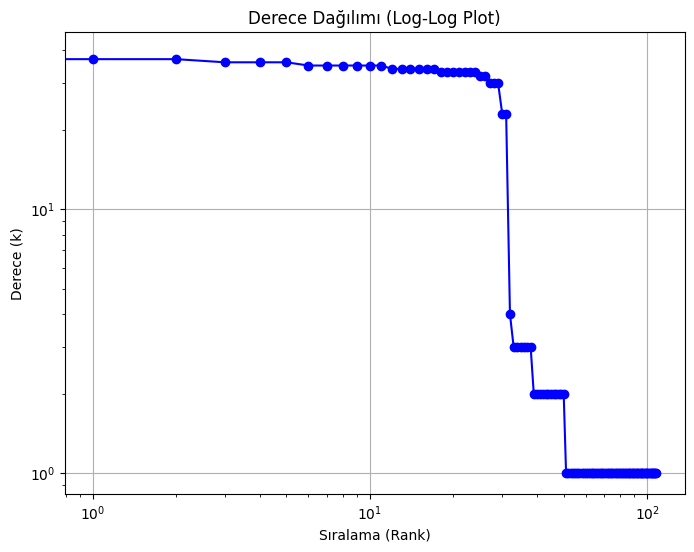

In [34]:
# ---Derece Dağılımı (Degree Distribution) Hesaplama ve Çizdirme ---
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.figure(figsize=(8, 6))
plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Derece Dağılımı (Log-Log Plot)")
plt.ylabel("Derece (k)")
plt.xlabel("Sıralama (Rank)")
plt.grid(True)
plt.show()

# **YORUM**

# Derece (Degree):
Bir takımın derecesi, o takımın sezon boyunca oynadığı farklı rakiplerin sayısını gösterir (tekrar eden maçlar silindiği için).

Yorum: Yüksek dereceli bir takım, ligdeki diğer takımların çoğuyla karşılaşmış demektir. MLB'de normal sezon yapısı gereği bu sayı genellikle takımlar arasında benzerdir veya lig/divizyon yapısına göre belirli gruplarda toplanır.


# Ortalama Derece (Average Degree):

Ağdaki her bir takımın ortalama kaç farklı rakiple maç yaptığını gösterir.

# Degree Centrality:

Bir takımın ağdaki popülaritesini veya görünürlüğünü ifade eder.

Yorum: En yüksek değere sahip takımlar en çok çeşitlilikte rakiple oynayanlardır.

# Closeness Centrality:

Bir takımın diğer tüm takımlara ne kadar "yakın" olduğunu gösterir.

Yorum: Eğer bir takımın closeness değeri yüksekse, bu takım dolaylı yoldan (rakibinin rakibi üzerinden) ligdeki herkese en hızlı ulaşan takımdır. Merkezi bir lig veya divizyon yapısında oynayan takımlarda yüksek çıkabilir.

# Betweenness Centrality:

Bir takımın, diğer takımlar arasındaki en kısa yollar üzerinde ne kadar sık bulunduğunu gösterir.

Yorum: MLB'de farklı ligler (American League ve National League) veya divizyonlar arası maç yapan (Interleague play) takımlar "köprü" görevi görür. Bu takımların betweenness değeri yüksek çıkar. Bu takımlar ağın bütünlüğünü sağlayan kilit takımlardır.

# Eigenvector & PageRank & Katz Centrality:

Bu metrikler sadece çok maç yapmayı değil, "önemli" (çok maç yapan) takımlarla maç yapmayı ölçer.

Yorum: Eğer bir takım, kendisi de birçok farklı takımla oynayan popüler takımlarla maç yapıyorsa (Strength of Schedule mantığı), bu değerleri yüksek çıkar.

# Modularity:

Ağın ne kadar iyi kümelere (topluluklara) ayrılabileceğini gösterir.

Yorum: MLB'de bu değer muhtemelen yüksek çıkacaktır çünkü takımlar genellikle kendi divizyonları veya ligleri (AL/NL) içindeki takımlarla daha sık oynarlar. Yüksek modularity, ligin belirgin gruplara (divizyonlara) ayrıldığını kanıtlar.

# Density (Yoğunluk):

Mümkün olan tüm eşleşmelerin ne kadarının gerçekleştiğini gösterir.

Yorum: MLB'de her takım her takımla oynamaz (veya nadir oynar). Bu yüzden yoğunluk değeri muhtemelen düşük çıkacaktır (seyrek ağ).
## Average Clustering Coefficient:

Bir takımın rakiplerinin birbirleriyle maç yapma olasılığıdır.

Yorum: "Arkadaşımın arkadaşı benim de arkadaşımdır" mantığı. Aynı divizyondaki takımlar birbirleriyle sürekli oynadıkları için bu değerin yerel gruplar içinde yüksek çıkması beklenir.

# Diameter (Çap):

Ağdaki birbirine en uzak iki takım arasındaki en kısa yolun uzunluğudur.

Yorum: "A takımı B ile oynadı, B C ile oynadı..." zincirinde, ligin bir ucundan diğer ucuna ulaşmak için gereken minimum maç bağlantısı sayısıdır. Düşük olması "Small World" (Küçük Dünya) özelliğine işaret eder.